# NSD Final Project

## Title: 

### Team member: 李心怡，尉银杰

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\EE}{\mathbb{E} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\xx}{\mathcal{X} }
\newcommand{\nn}{\mathcal{NN} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

### Abstract

### Table of content (optional)

### Introduction

- Hedging has always been a main concern for the sellside. Classic approach of hedging requires a specific model for the dynamics of the hedging instruments, e.g. Black-Scholes model and its variants, which the real data may not follow. Thus, accuracy of such hedging strategy is impaired once the underlying model is proven wrong.

- With the rise of modern machine learning techniques, more and more researchers tried to implement a model-free method which allows for theoretically perfect hedging. In addition, it is easier to add market frictions to such strategy. In our project, we will introduce a reinforcement learning method from the paper "Deep Hedging" (Buehler et al, 2019), and try to reproduce its experiment result.

### Setting 1 - Discrete-time Market with Friction

#### Discrete-time
Below are some basic notations for a discrete-time market.

- $T$: finite time horizon, maximum maturity of all instruments.

- $0=t_0<t_1<\cdots <t_n=T$: trading dates.

- $I_k \in \RR^r$: any NEW market information at time $t_k$.

- $\ff_k$: any market information at time $t_k$.

- $S = (S_k)_{k=0,1,\dots ,n}$, $S_k \in \RR_d$: prices of $d$ hedging instruments adapted to filtration $\ff$, including primary assets like equities and secondary assets like options.

- $Z$: agent's liabilities, which is a contingent claim and is adapted to filtration $\ff$.

- $\delta = (\delta_k)_{k=0,1,\dots ,n}$, $\delta_k \in \RR_d$: hedging strategy, where $\delta_k^i$ denotes agent's holdings of the $i$th asset at time $t_k$, and we stipulate that $\delta_{-1}=\delta_n=0$.

- $p_0$: addtional cash injected to the agent's portfolio at time $0$.



#### Frictions

We define the following variables to allow frictions in the market:

- $\hh^u$: unconstrained set of hedging strategy $\delta$.

- $\hh_k^c$: constrained set of the holdings at time $t_k$ due to liquidity, asset availability and trading restrictions.

- $H_k: \RR^{d(k+1)}\rightarrow\RR^{d}$: function that computes constrained holdings $\delta_k^c\in \hh_k^c$ from unconstrained holdings $\delta_k^u\in \hh^u$ and constrained holdings $\{\delta_i^c\in \hh_i^c\}$ for $i \in \{0,1,...,k-1\}$.

- $H$: constrained "projection" from $\hh^u$ to $\hh_k^c$. It can be defined successively as $(H\circ\delta_k^u)_k = H_k\{(H\circ\delta_0^u)_0,(H\circ\delta_1^u)_1,...,(H\circ\delta_{k-1}^u)_{k-1}, \delta_k^u\}$

- $c_k(\delta_k-\delta_{k-1})$: cost of trading incurred at time $t_k$ for changing the holdings from $\delta_k$ to $\delta_{k-1}$. Typically it takes one of the following forms:
<ul>
    
- Proportional transaction cost: $c_k(n) = \sum_{i=1}^d c_k^iS_k^i|n^i|$

- Fixed transaction cost: $c_k(n) = \sum_{i=1}^d c_k^i1_{|n^i|\ge \epsilon}$

- Complex cross asset cost: such as the cost of volatility
</ul>

- $C_T(\delta) = \sum_{k=1}^T c_k(\delta_k-\delta_{k-1})$: total transaction costs of trading a strategy $\delta$ up to maturity $T$.




#### Portfolio Value

Given the notations above, we have the terminal value of the agent's portfolio:
$$PL_T(Z,p_0,\delta) = -Z+p_0+(\delta\cdot S)_T-C_T(\delta)$$

### Setting 2 - Hedging under Convex Risk Measures

In a complete market without frictions, there exists a unique hedging strategy $\delta$ and a fair price $p_0$ such that $PL_T=0$ holds a.s. However, that is not the case in an incomplete market with friction. Thus, we have to first define a optimality criterion (here we choose convex risk measures). Then we define the optimal hedging strategy as a minimizer of that criterion.

#### Definition of convex risk measure
$\rho: \xx\rightarrow\RR$ is a convex risk measures if it satisfies:

- Monotone decreasing: if $X_1\ge X_2$ then $\rho(X_1)\le \rho(X_2)$.

- Convex: $\rho(aX_1+(1-a)X_2)\le a\rho(X_1)_(1-a)\rho(X_2)$ for $a\in [0,1]$

- Cash-Invariant: $\rho(X+c) = \rho(X)-c$ for $c\in\RR$
    
where $X_1, X_2, X\in\xx$ are asset positions, and comparisons between asset positions represents agent's preference. If $\rho(0)=0$ we call it normalized.

#### Optimal hedging strategy
Given the convex risk measure, our optimality problem for hedging becomes
$$
\pi(-Z) =\underset{\delta\in\hh^c}\inf\rho(-Z+(\delta\cdot S)_T-C_T(\delta)),
$$
where $\hh^c$ is the constrained set for trading strategy $\delta$.

So the optimal hedging policy $\delta$ is defined as the minimizer of $\pi(-Z)$.

#### Remark
Some literature uses risk adjusted return $\rho(X)=\EE[X]-\lambda Var(X)$ as the objective function, which is an ituitive measure of hedging performance. However it does not satisfy the monotone decreasing property, so it is not a convex risk measure. Therefore we will not use it in this project.

### Setting 3 - Pricing under Convex Risk Measures

In an incomplete market with friction, a fair price of $Z$ no longer exists, so we need to define an indifference price $p(Z)$.

#### Definition of indifference price
$p(Z)$ is the indifferent price of $Z$ that satisfies:
$$
\pi(-Z+p(Z))=\pi(0)\\
$$
By cash-invariant property of $\pi$ (which can be deduced from the cash-invariant property of $\rho$):
$$
p(Z) = \pi(-Z)-\pi(0)
$$

#### Remark
Financial meaning of indifference price: the minimal amount of cash we need to charge in order to make us indifferent between taking the position $-Z$ and not doing so under risk measure $\rho$.


### Setting 4 - Conditional Value at Risk (CVar)

We will choose the convex risk measure $\rho$ to be conditional value at risk (CVar, a.k.a. average value at risk or expected shortfall) in our numerical experiments. 

#### Definition of CVar
For random variable $X$, CVar is defined as follows:
$$
CVar(X)= \frac1{1-\alpha}\int_0^{1-\alpha}VaR_\gamma(X)dX
$$
where $\alpha \in [0,1)$ is known as level of risk aversion, and $VaR_\gamma(X) = \inf\{m\in\RR:\PP(X<-m)\le \gamma\}$.

#### Remark
Finacial meaning of CVar:
- $X$ is the return.
- Value at risk ($VaR_\gamma$) means that, with probability $\gamma$, we will get a return worse than $-VaR_\gamma$. In contrast to other risk measure like variance, it mainly focuses on the risk of potential shortfalls, and ignores how good returns can be for the top $100(1-\gamma)$ percent cases. 
- Conditional value at risk (CVar) takes the average of $VaR$ from $\gamma=0$ to $\gamma=1-\alpha$. It focuses the distribution of the bottom $100(1-\alpha)$ percent returns. 
<ul>
- For $\alpha$ close to 1 (i.e. $1-\alpha$ close to 0), we focus more on extremely bad cases and favor those strategies that give us less extremely bad returns (but also potentially less good returns). 
- For $\alpha$ close to 0 (i.e. $1-\alpha$ close to 1), CVar converges to expected return, i.e. we only concern about the average return regardless of its distribution (risk).
</ul>
Therefore $\alpha$ can ituitively be thought of as level of risk aversion (larger the $\alpha$, more risk averse).

### Neural Networks 1 - Definition of neural networks

A function $F:\RR^{N_0}\rightarrow\RR^{N_L}$ defined as
$$
F(x)=W_L\circ F_{L-1}\circ...\circ F_0
$$
is a feed forward neural network, where

- $L$: number of layer in neural network.
- $N_l$, $l\in \{0,1,...,L\}$: dimention of the $l$th layer. ($N_0$ input dimension, $N_L$ output dimension)
- $W_l(x) = A_lx+b_l$: affine function transforming the input $x$ from dimension $N_{l-1}$ to $N_l$.
- $\sigma:\RR\rightarrow\RR$: non-linear function (activation function) applied componentwise.
- $F_l(x) = \sigma\circ W_l(x)$: the $l$th layer in neural network.

#### Remark
- We denote by $\nn_{M,d_0,d_1}$ the set of neural networks that has $M$ non-zero parameters, input dimension $d_0$, output dimension $d_1$.
- Literature proved that neural networks with infinity number of parameters can approximate multivariate functions arbitrarily well, which serves as theoretical fundation for using neural networks to approximate our hedging strategy $\delta$.

### Neural Networks 2 - Semi-recurrent Neural Networks
We will use the following semi-recurrent neural network to approximate the optimal hedging strategy $\delta$:
$$
\delta_k = F_k(I_0,...,I_k,\delta_{k-1}) 
$$
for $k\in\{0,1,...,n-1\}$, where
$$
F_k\in \nn_{M,r(k+1)+d,d}.
$$

As a reminder:
- n is the number of trading dates, i.e. the time when we change our holdings.
- r is the dimension of new information $I_k$.


#### Remark
- Financial meaning of semi-recurrent neural network: at each time $t_k$, we input not only all the information available by the time $t_k$, but also our holdings $\delta_{k-1}$ which is computed previously from the same neural network (except $k=0$ when $\delta_{-1}$ is set to 0).

- In numerical experiment below, we will simplify the semi-recurrent neural network to
$$
\delta_k = F_k(I_k,\delta_{k-1}) ,
$$
i.e. our network only takes new information and current holdings as input and ignores the historical infomation.

### Neural Networks 3 - Loss Function for Neural Networks

In previous cells we have written the following objective function:
$$
\pi(-Z) =\underset{\delta\in\hh^c}\inf\rho(-Z+(\delta\cdot S)_T-C_T(\delta)).
$$

To make the constrained function an unconstrained one, we use the "projection" defined previously:
$$
\pi(-Z) =\underset{\delta\in\hh^u}\inf\rho(-Z+(H\circ\delta\cdot S)_T-C_T(H\circ\delta)).
$$

Now that $\delta$ is the output of the semi-recurrent neural network with $M$ parameters, we define $\hh_M$ the set of possible $\delta$ as
\begin{eqnarray*}
\hh_M
&=&\{
(\delta_k)_{k=0,1,...,n-1}\in\hh^u: 
\delta_k = F_k(I_0,...,I_k,\delta_{k-1})&,&
F_k\in \nn_{M,r(k+1)+d,d}
\}\\
&=&\{
(\delta_k^\theta)_{k=0,1,...,n-1}\in\hh^u: 
\delta_k^\theta = F^{\theta_k}(I_0,...,I_k,\delta_{k-1}^\theta)&,&
\theta_k\in \Theta_{M,r(k+1)+d,d}
\}
\end{eqnarray*}
where
- $\theta_k$ denotes network parameters for $F_k$. Note that $\theta_k$ is different for each $k$.
- $\Theta_{M,r(k+1)+d,d}$ denotes the parameter space for $\nn_{M,r(k+1)+d,d}$.
- $\delta_k^\theta$ denotes the holdings at time $t_k$ computed given $\theta_k\in \Theta_{M,r(k+1)+d,d}$.

Therefore, we have the final form of objective function
\begin{eqnarray*}
\pi^M(-Z)
&=&
\underset{\delta\in\hh_M}\inf\rho(-Z+(H\circ\delta\cdot S)_T-C_T(H\circ\delta)).\\
&=&
\underset{\theta\in\Theta_M}\inf\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))\\
\end{eqnarray*}
where $\Theta_M=\prod_{k=0}^{n-1}\Theta_{M,r(k+1)+d,d}$,

and solving this function is the same as finding finite dimensional parameter $\theta$ for our NN that minimize the following loss function
$$
L(\theta)=\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))
$$

#### Remark
- Because the neural network can approximate arbitrarily well when $M\rightarrow\infty$, $\hh_M\approx\hh^u$. So the optimal strategy computed using NN should be close to the real optimal solution.

- In practice we use gradient descent of the loss function w.r.t. the network parameters to training network. However, our network output $\delta^\theta$ is always transformed by the "projection" function $H$ in the loss function. As a result, if $\delta^\theta\notin \hh^c$, loss function can not pass this information through gradient descent to network parameters. Therefore, when $H\circ\delta^\theta=\delta^\theta$ is satisfied for all $\delta^\theta\in\hh^c$, we typically add a panelty term to the loss function:
$$
L(\theta)=\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))-\gamma\lVert \delta^\theta-H\circ\delta^\theta\rVert_1
$$
with $\gamma\gg 0$.

### Numerical Experiments 1: Experiment Design

We will reproduce in total 2 numerical experiments:

- 

In [73]:
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
################## parameters ####################
import numpy as np
# setting
T = 30  # time 0-T
year_dates = 365
d = 2  # number of instrument
time_list = list(range(T+1))

# Heston model parameters
N_sample = 10000
v0 = 0.04
kappa = 1.0 # alpha
theta = 0.04 # b
rho = -0.7
sigma = 2/np.sqrt(365)
spot = 100 # s0
rate = 0.0 # interest rate

# network param
input_shape = (T+1,d,)
hidden_dim = (d+15,d+15)
CVar_alpha = 0.5 # level of risk averse
is_simple = False # True-feed forward, False-semi recurrent

# training param
p_train,p_val,p_test = 0.7, 0.2, 0.1
batch_size = 256
n_epochs = 5

In [8]:
# Heston model generator

import QuantLib as ql

# Set up the flat risk-free curves
def build_heston_generator():
    
    today = ql.Date(1, 7, 2020)
    riskFreeCurve = ql.FlatForward(today, rate, ql.Actual365Fixed())
    flat_ts = ql.YieldTermStructureHandle(riskFreeCurve)
    dividend_ts = ql.YieldTermStructureHandle(riskFreeCurve)
    heston_process = ql.HestonProcess(flat_ts, dividend_ts, 
                                      ql.QuoteHandle(ql.SimpleQuote(spot)), 
                                      v0, kappa, theta, sigma, rho)
    dimension = heston_process.factors()
    hidden_generator = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(
                                    dimension * T, ql.UniformRandomGenerator()))
    generator = ql.GaussianMultiPathGenerator(heston_process, [t/year_dates for t in time_list], hidden_generator, False)
    return generator

path_generator = build_heston_generator()
type(path_generator)

QuantLib.QuantLib.GaussianMultiPathGenerator

In [9]:
import numpy as np
import pandas as pd

# save spot and vol paths from generator to dataframe
def generate_multi_paths_df(path_generator, num_paths):
    spot_paths,vol_paths = [], []
    for i in range(num_paths):
        sample_path = path_generator.next()
        value = sample_path.value()
        spot, vol = value
        spot_paths.append([x for x in spot])
        vol_paths.append([x for x in vol])
    df_spot = pd.DataFrame(spot_paths, columns=time_list)
    df_vol = pd.DataFrame(vol_paths, columns=time_list)
    return df_spot, df_vol

df_spot, df_vol = generate_multi_paths_df(path_generator, N_sample)

In [ ]:
df_spot.sample(5)

In [11]:
df_vol.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.04,0.037780,0.037082,0.039156,0.039768,0.039561,0.038706,0.039650,0.039598,0.039113,...,0.034452,0.034250,0.036073,0.034777,0.035444,0.034467,0.034587,0.035708,0.035648,0.036716
1,0.04,0.040482,0.041653,0.041464,0.042579,0.043447,0.043879,0.045032,0.044257,0.044903,...,0.045549,0.046791,0.046464,0.044553,0.044364,0.044885,0.044614,0.045038,0.044321,0.043693
2,0.04,0.040639,0.041819,0.042296,0.041795,0.042384,0.042985,0.043282,0.043096,0.043360,...,0.043111,0.044620,0.045461,0.045173,0.043648,0.045140,0.044280,0.044493,0.047316,0.047030
3,0.04,0.039704,0.039693,0.043219,0.043182,0.043938,0.043510,0.042920,0.043881,0.046144,...,0.050741,0.049058,0.049692,0.049677,0.050448,0.050907,0.052781,0.052215,0.051959,0.051509
4,0.04,0.039953,0.039616,0.039774,0.039793,0.040928,0.041677,0.043800,0.043985,0.043264,...,0.041155,0.040909,0.042290,0.040691,0.040338,0.039367,0.039054,0.037839,0.039087,0.039752


In [29]:
def calculate_variance_swap(v,t):
    T_minus_t = (T-t)/year_dates
    l = (v-theta)/kappa*(1-np.exp(-kappa*T_minus_t))+theta*T_minus_t
    return l
df_vol_avg = df_vol.cumsum(axis=1)*time_list/year_dates
T_minus_t =np.zeros((N_sample,1))+(T-np.array(time_list))/year_dates
df_l = (df_vol-theta)/kappa*(1-np.exp(-kappa*T_minus_t))+theta*T_minus_t
df_s2 = df_l+df_vol_avg


In [31]:
df_s2.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.003288,0.003222,0.003482,0.004165,0.004957,0.005907,0.007020,0.008477,0.010087,0.011878,...,0.049212,0.053481,0.058091,0.062753,0.067685,0.072720,0.077968,0.083495,0.089205,0.095197
1,0.003288,0.003435,0.003860,0.004408,0.005286,0.006387,0.007702,0.009320,0.011050,0.013121,...,0.055871,0.061200,0.066730,0.072364,0.078262,0.084450,0.090855,0.097541,0.104412,0.111478
2,0.003288,0.003448,0.003874,0.004477,0.005236,0.006308,0.007619,0.009150,0.010883,0.012886,...,0.055229,0.060413,0.065873,0.071540,0.077336,0.083517,0.089856,0.096463,0.103545,0.110847
3,0.003288,0.003374,0.003700,0.004525,0.005323,0.006421,0.007674,0.009146,0.010968,0.013154,...,0.058424,0.063928,0.069795,0.075919,0.082378,0.089139,0.096326,0.103736,0.111415,0.119344
4,0.003288,0.003394,0.003695,0.004252,0.005017,0.006090,0.007368,0.008996,0.010743,0.012662,...,0.053667,0.058522,0.063720,0.068989,0.074483,0.080123,0.085966,0.091928,0.098209,0.104752


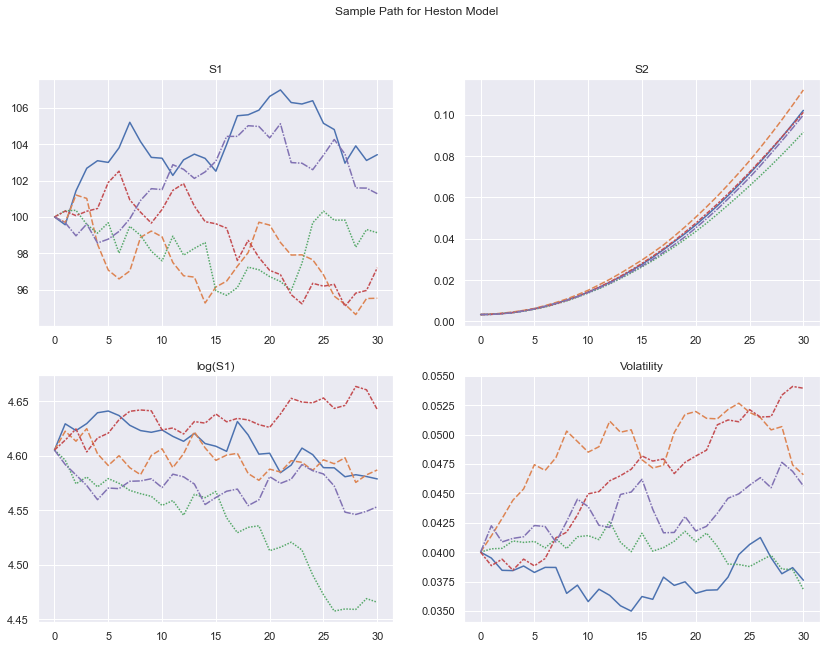

In [99]:
sample_Heston, axes = plt.subplots(2,2,figsize=(14, 10))
sample_Heston.suptitle('Sample Path for Heston Model')
sns.lineplot(data=df_spot.sample(5).transpose(),legend=False, ax = axes[0,0])
axes[0,0].set_title("S1")
sns.lineplot(data=np.log(df_spot.sample(5).transpose()),legend=False, ax = axes[1,0])
axes[1,0].set_title("log(S1)")
sns.lineplot(data=df_s2.sample(5).transpose(),legend=False, ax = axes[0,1])
axes[0,1].set_title("S2")
sns.lineplot(data=df_vol.sample(5).transpose(),legend=False, ax = axes[1,1])
axes[1,1].set_title("Volatility")
plt.show()

In [63]:
# data
info = np.ones((N_sample,T+1,d))
info[:,:,0] = np.log(df_spot.to_numpy())
info[:,:,1] = df_vol.to_numpy()
price = np.ones((N_sample,T+1,d))
price[:,:,0] = df_spot.to_numpy()
price[:,:,0] = df_s2.to_numpy()

# train, val, test split
for data in ['info','price']:
    df = globals()[data]
    globals()[data+'_train'] = df[:int(p_train*N_sample)]
    globals()[data+'_val'] = df[int(p_train*N_sample):int((p_val+p_train)*N_sample)]
    globals()[data+'_test'] = df[int((p_val+p_train)*N_sample):]

In [71]:
class SemiRecurrentNN:
    
    def __init__(self,input_shape,hidden_dim,CVar_alpha,is_simple=False,verbose=True):
        self.CVar_alpha = CVar_alpha
        self.build_model(input_shape,hidden_dim,is_simple,verbose)

        
    def build_model(self,input_shape,hidden_dim,is_simple=False,verbose=True):
        self.inputs = tf.keras.layers.Input(shape=input_shape)
        self.outputs = []
        for t in range(input_shape[0]-1): # build network for time t
            self.build_block(t,hidden_dim,is_simple)
        self.outputs = tf.keras.layers.Lambda(lambda x:tf.concat(x,axis=1))(self.outputs)
        self.model = tf.keras.models.Model(inputs=self.inputs, outputs=self.outputs)
        self.model.compile(loss=self.loss_CVar(), optimizer=tf.keras.optimizers.Adam(0.005))
        if verbose:
            self.model.summary()
        
        
    # network for time t_k
    def build_block(self,t,hidden_dim,is_simple=False):
        
        ############ input layer ############
        info = tf.keras.layers.Lambda(lambda x: x[:,t,:])(self.inputs)
                                                        # log(s1) and v at time t
        if t==0 or is_simple: # first trading date
            inputs = info
        else: # not the first trading date
            holdings = self.outputs[t-1] # holdings at time t-1
            inputs = tf.keras.layers.Lambda(lambda x:tf.concat(x,axis=1))([holdings,info])
            
        ########## hidden layers ########
        hidden1 = self.dense_layer(inputs,hidden_dim[0])
        hidden2 = self.dense_layer(hidden1,hidden_dim[1])
        output = tf.keras.layers.Dense(input_shape[1])(hidden2)
        
        ########### output ###########
        self.outputs.append(output)
        
        
    # hidden layer structure
    def dense_layer(self,inputs,dim):
        hidden = tf.keras.layers.Dense(dim)(inputs)
        hidden_bn = tf.keras.layers.BatchNormalization()(hidden)
        hidden_activated = tf.keras.layers.Activation('relu')(hidden_bn)
        return hidden_activated
    
    
    # loss function in keras loss function signiture
    def loss_CVar(self,cost=0):
        def loss(price,delta):
            ds1 = price[:,1:,0]-price[:,:-1,0]
            ds2 = price[:,1:,1]-price[:,:-1,1]
            delta1 = delta[:,:,0]
            delta2 = delta[:,:,1]
            PnL = tf.reduce_sum(tf.add(ds1*delta1,ds2*delta2), axis=1)
            # TODO: add cost loss
            CVar, _ = tf.nn.top_k(-PnL, tf.cast((1-self.CVar_alpha)*batch_size, tf.int32))
            return tf.reduce_mean(CVar)
        return loss
        
        
    def fit(self, info, price, batch_size, n_epochs, inputs_val, price_val):
        self.model.fit(info, price, batch_size=batch_size, epochs=n_epochs,
                                       validation_data=(inputs_val,price_val))

        

In [72]:
import tensorflow as tf
semi_recurrent_nn = SemiRecurrentNN(input_shape,hidden_dim,CVar_alpha,is_simple,verbose=False)
semi_recurrent_nn.fit(info_train, price_train, batch_size, n_epochs, info_val, price_val)

Epoch 1/5


ValueError: in user code:

    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    <ipython-input-71-63675d1fd9d7>:54 loss
        delta1 = delta[:,:,0]
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:984 _slice_helper
        name=name)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1150 strided_slice
        shrink_axis_mask=shrink_axis_mask)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py:10179 strided_slice
        shrink_axis_mask=shrink_axis_mask, name=name)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /Users/ayi/.local/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Index out of range using input dim 2; input has only 2 dims for '{{node loss/strided_slice_4}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=3, ellipsis_mask=0, end_mask=3, new_axis_mask=0, shrink_axis_mask=4](model_7/lambda_481/concat, loss/strided_slice_4/stack, loss/strided_slice_4/stack_1, loss/strided_slice_4/stack_2)' with input shapes: [?,60], [3], [3], [3] and with computed input tensors: input[3] = <1 1 1>.


### Numerical Experiments 2:  

### Conclusion and discussions

### Reference (optional)